In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import time
from sklearn.utils import shuffle

In [2]:
x = np.loadtxt("features.txt", delimiter = ",") #Reading the features into x
y = np.loadtxt("target.txt") #Reading the target values into y

In [3]:
def fwb(w,b,x,y):  #This function is used to calculate the cost function(w,b)
    c = 100
    value = 0
    for i in range(len(x)):
        value += max(0, 1 - y[i]*(np.dot(w, x[i]) + b))
    value = c*value + 0.5*(np.sum(np.square(w)))
    return value

In [4]:
def part_w(w,b,x,y,MB,l,SD): #for calculating the partial differentiation w.r.t. w
    if (SD == True):         #if it is a stochastic gradient descent the batch is 1
        batch = 1            #if it is mini batch the batch size is 20
    else:                    #if for loop range changes for mini-batch and stochastic 
        batch = 20           #if it is batch gradient descent then the range is 1 to n
    if (MB == True):
        c = 100
        val = 0
        for i in range(l*batch, min(len(x),(l+1)*batch)):
            if (y[i]*(np.dot(w, x[i]) + b) >= 1):
                val += 0
            else:
                val += -(y[i]*x[i])
        q = w + c*val
        return q
        
    else:
        c = 100
        val = 0
        for i in range(len(x)):
            if (y[i]*(np.dot(w, x[i]) + b) >= 1): #if the condition is true add 0 else add -yi*xi
                val += 0
            else:
                val += -(y[i]*x[i])
        q = w + c*val
        return q

In [5]:
def part_b(w,b,x,y,MB,l,SD): #for calculating the partial differentiation w.r.t. b
    if (SD == True):         #has the same statements excepts for else condition
        batch = 1            #here else is just add -yi
    else:
        batch = 20
    if (MB == True):
        c = 100
        val = 0
        for i in range(l*batch, min(len(x),(l+1)*batch)):
            if (y[i]*(np.dot(w, x[i]) + b) >= 1):
                val += 0
            else:
                val += -(y[i])
        return c*val
        
    else:
        c = 100
        val = 0
        for i in range(len(x)):
            if (y[i]*(np.dot(w, x[i]) + b) >= 1):
                val += 0
            else:
                val += -(y[i])
        return c*val

# Batch gradient descent

In [6]:
#intial values for batch gradient descent
w = np.zeros((1, len(x[0]))) 
b = 0
e = 0.25
eta = 0.0000003
n_cost = fwb(w,b,x,y)
cost = n_cost

In [7]:
cost_list = []                             #for adding all the cost values 
k = 0                                      #to check in how many iterations it converge 
while cost > e:
    start = time.time()                    #for calculating total time taken to converge
    o_cost = n_cost                        #assign new cost value to old cost
    w -= eta*part_w(w,b,x,y,False,k,False) #updating the w
    b -= eta*part_b(w,b,x,y,False,k,False) #updating the b
    k += 1 
    n_cost = fwb(w,b,x,y)                  #calucating the new cost with updated values
    cost = abs(o_cost - n_cost)*100/o_cost #finding the cost percentage
    cost_list.append(float(n_cost))
    
ti = time.time() - start
for i in range (0, k, 10):
    print("Iteration {}: {}".format(i,cost_list[i]))
print("Total No of Iteration: ", k)
print("Total Time Taken: ", ti)

Iteration 0: 391940.8195894017
Iteration 10: 297907.030438882
Iteration 20: 287943.5467759871
Iteration 30: 279253.0211807995
Iteration 40: 270940.3295418842
Iteration 50: 262830.7414175249
Total No of Iteration:  57
Total Time Taken:  0.14676570892333984


# Stochastic gradient descent

In [8]:
#intial values for stochastic gradient descent
w = np.zeros((1, len(x[0])))
b = 0
e = 0.001
eta = 0.0001
n_cost_i = 1


In [9]:
#before starting this method just shuffling the data first
X,Y = shuffle(x, y)
n_cost = fwb(w,b,X,Y)
#almost the same implementation as batch gradient descent
cost_l = []
i = 0
k = 0
while n_cost_i > e:
    start2 = time.time()
    o_cost = n_cost
    o_cost_i = n_cost_i
    
    w -= eta*part_w(w,b,X,Y,True,i,True)
    b -= eta*part_b(w,b,X,Y,True,i,True)
    
    i = int((i+1) % len(x))     #the only difference is that we are just doing it for single data instead of whole dataset
    k += 1
    n_cost = fwb(w,b,X,Y)
    cost_per = abs(o_cost - n_cost)*100/o_cost #finding the cost percentage
    n_cost_i = o_cost_i*0.5 + 0.5*cost_per     #finding the new cost
    cost_l.append(float(n_cost))
ti = time.time() - start2
for i in range (0, k, 10):
    print("Iteration {}: {}".format(i,cost_l[i]))
print("Total No of Iteration: ", k)
print("Total Time Taken: ", ti)

Iteration 0: 616060.0006999949
Iteration 10: 479126.0881635783
Iteration 20: 376131.31609428604
Iteration 30: 334780.1476085803
Iteration 40: 317167.5677450451
Iteration 50: 314930.1505160717
Iteration 60: 314735.16659105796
Iteration 70: 311073.99055981066
Iteration 80: 310357.42641309794
Iteration 90: 311338.8941520772
Iteration 100: 314023.5545089302
Iteration 110: 305278.4582415382
Iteration 120: 326978.9170357094
Iteration 130: 301142.0600122186
Iteration 140: 301637.1406057821
Iteration 150: 304023.7704364434
Iteration 160: 302728.83466217166
Iteration 170: 300164.3041410311
Iteration 180: 321384.3771396961
Iteration 190: 321538.43150965055
Iteration 200: 331462.36907755164
Iteration 210: 314187.17746552435
Iteration 220: 298050.1259032328
Iteration 230: 305968.2907610935
Iteration 240: 299933.8718464111
Iteration 250: 299578.17118525587
Iteration 260: 294568.1646632489
Iteration 270: 302622.1281902846
Iteration 280: 291669.51148884173
Iteration 290: 306996.06873198226
Iteration 

# Mini batch gradient descent

In [10]:
#intial values for Mini batch gradient descent
w = np.zeros((1, len(x[0])))
b = 0
e = 0.01
eta = 0.00001
batch = 20
n_cost_i = 1
#shuffling the data
X,Y = shuffle(x, y)
n_cost = fwb(w,b,X,Y)

In [11]:
#Does not differ much from stochastic gradient descent
l = 0
k = 0
c_l = []
while n_cost_i > e:
    start1 = time.time()
    o_cost = n_cost
    o_cost_i = n_cost_i
    w -= eta*part_w(w,b,X,Y,True,l,False)
    b -= eta*part_b(w,b,X,Y,True,l,False)
    l = int((l+1) % ((len(x) + batch - 1)/batch)) #only difference is sending the batch everytime instead of 1 element.
    k += 1
    n_cost = fwb(w,b,X,Y)
    cost_per = abs(o_cost - n_cost)*100/o_cost
    n_cost_i = o_cost_i*0.5 + 0.5*cost_per
    c_l.append(float(n_cost))
ti = time.time() - start1
for i in range (0, k, 10):
    print("Iteration {}: {}".format(i,c_l[i]))
print("Total No of Iteration: ", k)
print("Total Time Taken: ", ti)

Iteration 0: 610390.5005660009
Iteration 10: 396009.3669437771
Iteration 20: 313160.1795954447
Iteration 30: 310040.41264548857
Iteration 40: 307127.1274534456
Iteration 50: 306362.3107181005
Iteration 60: 304480.6516783855
Iteration 70: 305546.4458309105
Iteration 80: 301960.14619021915
Iteration 90: 300441.48557842855
Iteration 100: 298439.6368830812
Iteration 110: 297645.09409445093
Iteration 120: 300889.75685907324
Iteration 130: 295693.45532474865
Iteration 140: 295389.6776682019
Iteration 150: 294276.80934887106
Iteration 160: 293872.1869973836
Iteration 170: 292776.03797279054
Iteration 180: 291427.13247008115
Iteration 190: 291287.05776309187
Iteration 200: 289935.1200759146
Iteration 210: 288711.41296109755
Iteration 220: 288902.91045498854
Iteration 230: 287161.1762512334
Iteration 240: 287551.5965898688
Iteration 250: 287666.77768047637
Iteration 260: 284114.181350883
Iteration 270: 283904.9750027636
Iteration 280: 282257.1523011221
Iteration 290: 281244.87675168813
Iteratio

# Plotting the graph for all the three methods

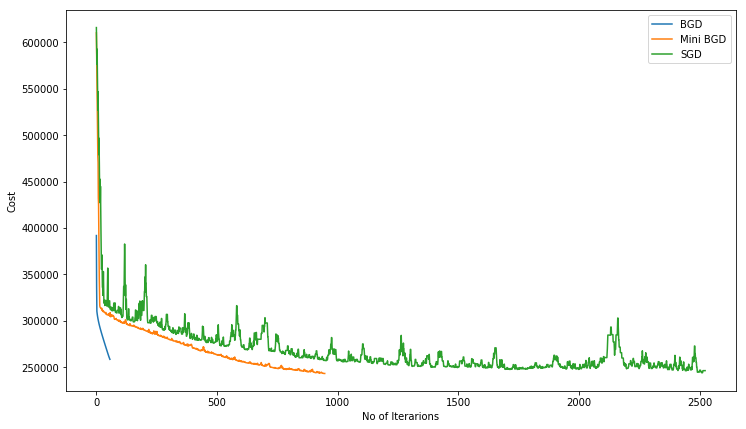

In [12]:

fig, ax = plt.subplots(figsize = (12,7))
ax.plot(cost_list, label = "BGD")
ax.plot(c_l, label = "Mini BGD")
ax.plot(cost_l, label = "SGD")
ax.set_ylabel("Cost")
ax.set_xlabel("No of Iterarions")
ax.legend()
plt.show()